<a href="https://colab.research.google.com/github/Kristiee/Python/blob/master/coin_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting coins in an Image

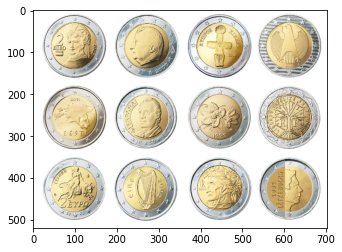

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

!wget -q -O save.jpeg 'https://storage.googleapis.com/codehub-data/1-A-8-2-save.jpeg'

image = cv2.imread('save.jpeg')
image = cv2.resize(image, None, fx=0.4, fy=0.4)
plt.imshow(image[..., ::-1])
plt.show()

### Process `image` to Form a Mask of Coins]

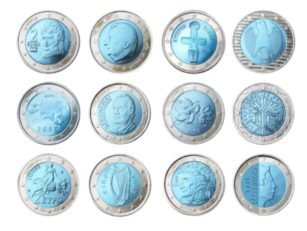

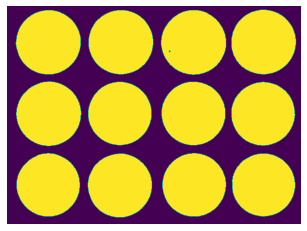

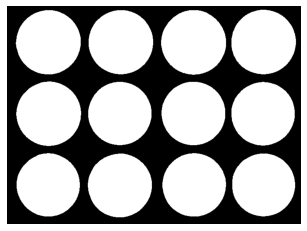

In [10]:
coins_mask = None
coins_mask_clear = None
lower_white = np.array([250,250,250])
upper_white = np.array([255,255,255])
gray = cv2.GaussianBlur(image, (5, 5), 1)
plt.imshow(gray)
plt.axis('off')
plt.show()
coins_mask = cv2.inRange(gray, lower_white, upper_white)
coins_mask = 255 - coins_mask
coins_mask_clear = cv2.erode(coins_mask, (5,5))
plt.imshow(coins_mask_clear)
plt.axis('off')
plt.show()

kernel = np.ones((5, 5),np.uint8)

opening = cv2.morphologyEx(coins_mask_clear, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)


plt.imshow(closing, cmap='gray')
plt.axis('off')
plt.show()

###  Find Contours in the Coin Mask
Find contours in the coin mask from the above step.

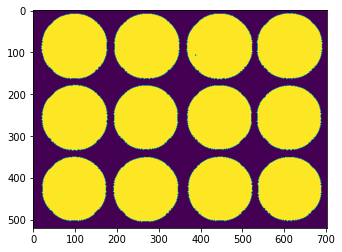

In [11]:
contour_image, contours, heirarchy = None, [], None

contours_image = coins_mask.copy()
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    cv2.drawContours(contours_image, contour, -1, (255, 255, 250), 3)
plt.figure()
plt.imshow(contours_image)

### Enclosing Circles 
Fit a minimum enclosing circle for each contour in the mask. For each circle, append a list of its x-coordinate, y-coordinate and radius to the list `circles`.


In [12]:
circles = []

'''
circles should resemble
circles = [
              [x1, y1, radius1],
              [x2, y2, radius2],
              [x3, y3, radius3]
          ]
'''
for contour in contours:
    center, radius = cv2.minEnclosingCircle(contour)
    circles.append([center[0],center[1],radius])
print(circles)
print(len(circles))

[[611.8935546875, 425.848388671875, 75.54761505126953], [269.23687744140625, 427.726318359375, 76.57843780517578], [446.6213684082031, 426.5417785644531, 75.98514556884766], [97.93275451660156, 426.31329345703125, 75.50940704345703], [611.0032958984375, 256.36212158203125, 76.01536560058594], [444.75213623046875, 255.48226928710938, 76.28204345703125], [269.05072021484375, 256.11114501953125, 75.73622131347656], [99.06097412109375, 256.30487060546875, 77.20397186279297], [445.2426452636719, 86.65777587890625, 77.59092712402344], [271.31414794921875, 85.79765319824219, 77.13204956054688], [98.32095336914062, 85.40743255615234, 77.52303314208984], [612.025634765625, 86.17303466796875, 77.58934783935547]]
12


### Find out the coins in the circles
Loop through the approximated circles and find the circles. For the example image, you can use very simple logic to filter the coins, for example, ignore all circles that are too small or too large. Estimate the radii of the coins by at looking the image above.


In [13]:
coin_circles = []

for circle in circles:
    radius = circle[2]
    if radius >70:
        coin_circles.append(circle)
print(len(coin_circles))


12


### Draw Circles around Coins
Draw circles for each coin using the enclosing circles' centers and radii. Draw red circles of width 10 pixels on a copy of the original `image`.

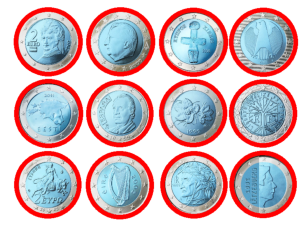

In [14]:
image_with_coins = image.copy()
red = (255, 0, 0)
width = 10

for circle in coin_circles:
    image = cv2.circle(image, (int(circle[0]),int(circle[1])), int(circle[2]), red, width) 
plt.imshow(image)
plt.axis('off')
plt.show()